In [8]:
#import sys
#!{sys.executable} -m pip install simpletransformers --user

In [9]:
#import sys
#!{sys.executable} -m pip install wandb --user

In [10]:
#import pandas and numpy
import numpy as np
import pandas as pd

#read the train csv file and explore
df = pd.read_csv('train.csv')
df_test_2 = pd.read_csv('test.csv')
display(df.head())
display(df_test_2.head())

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [11]:
#perform EDA on the dataframe
display("shape of the dataframe is:",df.shape)
display("column names are as follows:",df.columns)
index_final = df.columns.tolist()

'shape of the dataframe is:'

(20972, 9)

'column names are as follows:'

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [13]:
df.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#get the number of research paper under each tag
#tag names
tagnames = df.drop(['ID','TITLE','ABSTRACT'],axis=1).columns.tolist()
display(tagnames)

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

In [15]:
tagno = {}
for name in tagnames:
    tagno.update({name:df[name].sum()})
display(tagno)

{'Computer Science': 8594,
 'Physics': 6013,
 'Mathematics': 5618,
 'Statistics': 5206,
 'Quantitative Biology': 587,
 'Quantitative Finance': 249}

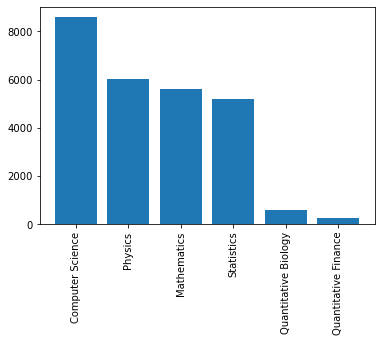

In [16]:
#import matplotlib and plot number of research paper under each tag
import matplotlib.pyplot as plt
plt.bar(range(len(tagno)),list(tagno.values()),align ='center')
plt.xticks(range(len(tagno)),list(tagno.keys()),rotation = 90)
plt.show()

'maximum tags that belong to a research paper are:'

3

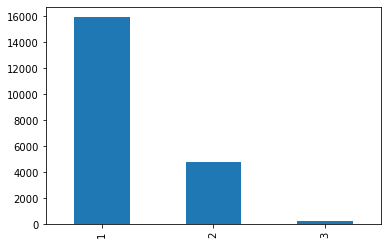

In [17]:
# find the maximum number of tags present for a research paper
df['combinations'] = df['Computer Science'] + df['Physics'] + df['Mathematics'] + df['Statistics'] + df['Quantitative Biology'] + df['Quantitative Finance']
display("maximum tags that belong to a research paper are:", df['combinations'].max())
df['combinations'].value_counts().plot(kind = 'bar')

In [18]:
# find all unique combinations of 3 tags
from itertools import combinations
comb2,comb3 = list(combinations(tagnames,2)),list(combinations(tagnames,3))
totcomb = [list(ele) for ele in comb2+comb3]
totcomb = totcomb + [[el] for el in tagnames]
display(totcomb)
display("total tag combinations that can be possibly present:", len(totcomb))

[['Computer Science', 'Physics'],
 ['Computer Science', 'Mathematics'],
 ['Computer Science', 'Statistics'],
 ['Computer Science', 'Quantitative Biology'],
 ['Computer Science', 'Quantitative Finance'],
 ['Physics', 'Mathematics'],
 ['Physics', 'Statistics'],
 ['Physics', 'Quantitative Biology'],
 ['Physics', 'Quantitative Finance'],
 ['Mathematics', 'Statistics'],
 ['Mathematics', 'Quantitative Biology'],
 ['Mathematics', 'Quantitative Finance'],
 ['Statistics', 'Quantitative Biology'],
 ['Statistics', 'Quantitative Finance'],
 ['Quantitative Biology', 'Quantitative Finance'],
 ['Computer Science', 'Physics', 'Mathematics'],
 ['Computer Science', 'Physics', 'Statistics'],
 ['Computer Science', 'Physics', 'Quantitative Biology'],
 ['Computer Science', 'Physics', 'Quantitative Finance'],
 ['Computer Science', 'Mathematics', 'Statistics'],
 ['Computer Science', 'Mathematics', 'Quantitative Biology'],
 ['Computer Science', 'Mathematics', 'Quantitative Finance'],
 ['Computer Science', 'Sta

'total tag combinations that can be possibly present:'

41

In [19]:
# find the counts of all unique combinations of tags
from collections import Counter
co = []
for index, row in df.iterrows():
    l = []
    for name in tagnames:
        if row[name] == 1:
            l.append(name)
    co.append(l)
Ot = Counter([tuple(i) for i in co])
display(Ot,"number of unique combinations",len(Ot))

Counter({('Computer Science',): 4910,
         ('Mathematics',): 3610,
         ('Computer Science', 'Statistics'): 2285,
         ('Physics',): 5120,
         ('Quantitative Biology',): 443,
         ('Statistics',): 1636,
         ('Physics', 'Mathematics'): 293,
         ('Mathematics', 'Statistics'): 825,
         ('Computer Science', 'Mathematics'): 682,
         ('Quantitative Finance',): 209,
         ('Computer Science', 'Physics'): 437,
         ('Computer Science', 'Mathematics', 'Statistics'): 179,
         ('Physics', 'Statistics'): 99,
         ('Computer Science', 'Physics', 'Statistics'): 36,
         ('Computer Science', 'Quantitative Biology'): 30,
         ('Statistics', 'Quantitative Biology'): 105,
         ('Statistics', 'Quantitative Finance'): 24,
         ('Physics', 'Mathematics', 'Statistics'): 9,
         ('Computer Science', 'Quantitative Finance'): 9,
         ('Quantitative Biology', 'Quantitative Finance'): 4,
         ('Computer Science', 'Statistics', '

'number of unique combinations'

24

In [20]:
# analysing the words in titles and abstracts
titles = []
abstracts = []
for index,row in df.iterrows():
    l = row['TITLE'].split()
    m = row['ABSTRACT'].split()
    for el in l:
        titles.append(el)
    for ele in m:
        abstracts.append(ele)
display(titles)
display(abstracts)

['Reconstructing',
 'Subject-Specific',
 'Effect',
 'Maps',
 'Rotation',
 'Invariance',
 'Neural',
 'Network',
 'Spherical',
 'polyharmonics',
 'and',
 'Poisson',
 'kernels',
 'for',
 'polyharmonic',
 'functions',
 'A',
 'finite',
 'element',
 'approximation',
 'for',
 'the',
 'stochastic',
 'Maxwell--Landau--Lifshitz--Gilbert',
 'system',
 'Comparative',
 'study',
 'of',
 'Discrete',
 'Wavelet',
 'Transforms',
 'and',
 'Wavelet',
 'Tensor',
 'Train',
 'decomposition',
 'to',
 'feature',
 'extraction',
 'of',
 'FTIR',
 'data',
 'of',
 'medicinal',
 'plants',
 'On',
 'maximizing',
 'the',
 'fundamental',
 'frequency',
 'of',
 'the',
 'complement',
 'of',
 'an',
 'obstacle',
 'On',
 'the',
 'rotation',
 'period',
 'and',
 'shape',
 'of',
 'the',
 'hyperbolic',
 'asteroid',
 '1I/`Oumuamua',
 '(2017)',
 'U1',
 'from',
 'its',
 'lightcurve',
 'Adverse',
 'effects',
 'of',
 'polymer',
 'coating',
 'on',
 'heat',
 'transport',
 'at',
 'solid-liquid',
 'interface',
 'SPH',
 'calculations',
 'o

['Predictive',
 'models',
 'allow',
 'subject-specific',
 'inference',
 'when',
 'analyzing',
 'disease',
 'related',
 'alterations',
 'in',
 'neuroimaging',
 'data.',
 'Given',
 'a',
 "subject's",
 'data,',
 'inference',
 'can',
 'be',
 'made',
 'at',
 'two',
 'levels:',
 'global,',
 'i.e.',
 'identifiying',
 'condition',
 'presence',
 'for',
 'the',
 'subject,',
 'and',
 'local,',
 'i.e.',
 'detecting',
 'condition',
 'effect',
 'on',
 'each',
 'individual',
 'measurement',
 'extracted',
 'from',
 'the',
 "subject's",
 'data.',
 'While',
 'global',
 'inference',
 'is',
 'widely',
 'used,',
 'local',
 'inference,',
 'which',
 'can',
 'be',
 'used',
 'to',
 'form',
 'subject-specific',
 'effect',
 'maps,',
 'is',
 'rarely',
 'used',
 'because',
 'existing',
 'models',
 'often',
 'yield',
 'noisy',
 'detections',
 'composed',
 'of',
 'dispersed',
 'isolated',
 'islands.',
 'In',
 'this',
 'article,',
 'we',
 'propose',
 'a',
 'reconstruction',
 'method,',
 'named',
 'RSM,',
 'to',
 'imp

In [21]:
# combine title and abstract
df['title_abstract_combined'] = df['TITLE'] + ' ' + df['ABSTRACT']
df_test_2['title_abstract_combined'] = df_test_2['TITLE'] + ' ' + df_test_2['ABSTRACT']
display(df.head())
display(df_test_2.head())

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,combinations,title_abstract_combined
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,Reconstructing Subject-Specific Effect Maps ...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,Rotation Invariance Neural Network Rotation ...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1,Spherical polyharmonics and Poisson kernels fo...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1,A finite element approximation for the stochas...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,2,Comparative study of Discrete Wavelet Transfor...


,ID,TITLE,ABSTRACT,title_abstract_combined
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,Closed-form Marginal Likelihood in Gamma-Poiss...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,Laboratory mid-IR spectra of equilibrated and ...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,Case For Static AMSDU Aggregation in WLANs F...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,The $Gaia$-ESO Survey: the inner disk intermed...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,Witness-Functions versus Interpretation-Functi...


In [22]:
# remove ID, TITLE, ABSTRACT, combinations, title_processed, and abstract_processed columns
df = df.drop(labels = ['ID','TITLE','ABSTRACT','combinations'], axis = 1)
display(df.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,0,0,1,0,0,0,A finite element approximation for the stochas...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [23]:
df_test_2 = df_test_2.drop(labels = ['ID','TITLE','ABSTRACT'], axis = 1)
display(df_test_2.head())

,title_abstract_combined
0,Closed-form Marginal Likelihood in Gamma-Poiss...
1,Laboratory mid-IR spectra of equilibrated and ...
2,Case For Static AMSDU Aggregation in WLANs F...
3,The $Gaia$-ESO Survey: the inner disk intermed...
4,Witness-Functions versus Interpretation-Functi...


In [24]:
# load the regular expressions library
import re

#remove punctuation from title and abstract
df['title_abstract_combined_processed'] = df['title_abstract_combined'].map(lambda x: re.sub('[,\.!?0-9]', ' ',x))
df_test_2['title_abstract_combined_processed'] = df_test_2['title_abstract_combined'].map(lambda x: re.sub('[,\.!?0-9]', ' ',x))

df['title_abstract_combined_processed'] = df['title_abstract_combined_processed'].map(lambda x: re.sub('[\W_]+', ' ',x))
df_test_2['title_abstract_combined_processed'] = df_test_2['title_abstract_combined_processed'].map(lambda x: re.sub('[\W_]+', ' ',x))

#convert the title and abstract to lowercase
df['title_abstract_combined_processed'] = df['title_abstract_combined_processed'].map(lambda x: x.lower())
df_test_2['title_abstract_combined_processed'] = df_test_2['title_abstract_combined_processed'].map(lambda x: x.lower())
display(df.head())
display(df_test_2.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,title_abstract_combined_processed
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics and poisson kernels fo...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,a finite element approximation for the stochas...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study of discrete wavelet transfor...


,title_abstract_combined,title_abstract_combined_processed
0,Closed-form Marginal Likelihood in Gamma-Poiss...,closed form marginal likelihood in gamma poiss...
1,Laboratory mid-IR spectra of equilibrated and ...,laboratory mid ir spectra of equilibrated and ...
2,Case For Static AMSDU Aggregation in WLANs F...,case for static amsdu aggregation in wlans fra...
3,The $Gaia$-ESO Survey: the inner disk intermed...,the gaia eso survey the inner disk intermediat...
4,Witness-Functions versus Interpretation-Functi...,witness functions versus interpretation functi...


In [25]:
# analysing the words in titles and abstracts
titles_pr = []
abstracts_pr = []
for index,row in df.iterrows():
    l = row['title_abstract_combined_processed'].split()
    m = row['title_abstract_combined_processed'].split()
    for el in l:
        titles_pr.append(el)
    for ele in m:
        abstracts_pr.append(ele)
display(titles_pr)
display(abstracts_pr)

['reconstructing',
 'subject',
 'specific',
 'effect',
 'maps',
 'predictive',
 'models',
 'allow',
 'subject',
 'specific',
 'inference',
 'when',
 'analyzing',
 'disease',
 'related',
 'alterations',
 'in',
 'neuroimaging',
 'data',
 'given',
 'a',
 'subject',
 's',
 'data',
 'inference',
 'can',
 'be',
 'made',
 'at',
 'two',
 'levels',
 'global',
 'i',
 'e',
 'identifiying',
 'condition',
 'presence',
 'for',
 'the',
 'subject',
 'and',
 'local',
 'i',
 'e',
 'detecting',
 'condition',
 'effect',
 'on',
 'each',
 'individual',
 'measurement',
 'extracted',
 'from',
 'the',
 'subject',
 's',
 'data',
 'while',
 'global',
 'inference',
 'is',
 'widely',
 'used',
 'local',
 'inference',
 'which',
 'can',
 'be',
 'used',
 'to',
 'form',
 'subject',
 'specific',
 'effect',
 'maps',
 'is',
 'rarely',
 'used',
 'because',
 'existing',
 'models',
 'often',
 'yield',
 'noisy',
 'detections',
 'composed',
 'of',
 'dispersed',
 'isolated',
 'islands',
 'in',
 'this',
 'article',
 'we',
 'prop

['reconstructing',
 'subject',
 'specific',
 'effect',
 'maps',
 'predictive',
 'models',
 'allow',
 'subject',
 'specific',
 'inference',
 'when',
 'analyzing',
 'disease',
 'related',
 'alterations',
 'in',
 'neuroimaging',
 'data',
 'given',
 'a',
 'subject',
 's',
 'data',
 'inference',
 'can',
 'be',
 'made',
 'at',
 'two',
 'levels',
 'global',
 'i',
 'e',
 'identifiying',
 'condition',
 'presence',
 'for',
 'the',
 'subject',
 'and',
 'local',
 'i',
 'e',
 'detecting',
 'condition',
 'effect',
 'on',
 'each',
 'individual',
 'measurement',
 'extracted',
 'from',
 'the',
 'subject',
 's',
 'data',
 'while',
 'global',
 'inference',
 'is',
 'widely',
 'used',
 'local',
 'inference',
 'which',
 'can',
 'be',
 'used',
 'to',
 'form',
 'subject',
 'specific',
 'effect',
 'maps',
 'is',
 'rarely',
 'used',
 'because',
 'existing',
 'models',
 'often',
 'yield',
 'noisy',
 'detections',
 'composed',
 'of',
 'dispersed',
 'isolated',
 'islands',
 'in',
 'this',
 'article',
 'we',
 'prop

In [26]:
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

#remove stop_words
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("",sentence)
df['title_abstract_combined_processed']=df['title_abstract_combined_processed'].apply(removeStopWords)
df_test_2['title_abstract_combined_processed']=df_test_2['title_abstract_combined_processed'].apply(removeStopWords)
display(df.head())
display(df_test_2.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,title_abstract_combined_processed
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics poisson kernels polyha...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,finite element approximation stochastic maxwel...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study discrete wavelet transforms ...


,title_abstract_combined,title_abstract_combined_processed
0,Closed-form Marginal Likelihood in Gamma-Poiss...,closed form marginal likelihood gamma poisson ...
1,Laboratory mid-IR spectra of equilibrated and ...,laboratory mid ir spectra equilibrated igneous...
2,Case For Static AMSDU Aggregation in WLANs F...,case static amsdu aggregation wlans frame aggr...
3,The $Gaia$-ESO Survey: the inner disk intermed...,gaia eso survey inner disk intermediate age op...
4,Witness-Functions versus Interpretation-Functi...,witness functions versus interpretation functi...


In [27]:
#do stemming on title and abstract
stemmer=SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['title_abstract_combined_processed']=df['title_abstract_combined_processed'].apply(stemming)
df_test_2['title_abstract_combined_processed']=df_test_2['title_abstract_combined_processed'].apply(stemming)
display(df.head())
display(df_test_2.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,title_abstract_combined_processed
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstruct subject specif effect map predict ...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotat invari neural network rotat invari trans...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spheric polyharmon poisson kernel polyharmon f...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,finit element approxim stochast maxwel landau ...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,compar studi discret wavelet transform wavelet...


,title_abstract_combined,title_abstract_combined_processed
0,Closed-form Marginal Likelihood in Gamma-Poiss...,close form margin likelihood gamma poisson mat...
1,Laboratory mid-IR spectra of equilibrated and ...,laboratori mid ir spectra equilibr igneous met...
2,Case For Static AMSDU Aggregation in WLANs F...,case static amsdu aggreg wlan frame aggreg mec...
3,The $Gaia$-ESO Survey: the inner disk intermed...,gaia eso survey inner disk intermedi age open ...
4,Witness-Functions versus Interpretation-Functi...,wit function versus interpret function secreci...


In [28]:
#pip install keras
#import sys
#!{sys.executable} -m pip install spacy
#import sys
#!{sys.executable} -m pip install logging

In [59]:
import gensim
from gensim.models import Word2Vec
from time import time
from collections import defaultdict
import spacy
import logging
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", datefmt = '%H:%M:%S', level = logging.INFO)

In [60]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in df['title_abstract_combined_processed']]
sent_test_2 = [row.split() for row in df_test_2['title_abstract_combined_processed']]
phrases = Phrases(sent, min_count = 10, progress_per = 10000)
phrases_test_2 = Phrases(sent_test_2, min_count = 10, progress_per = 10000)

INFO - 18:02:39: collecting all words and their counts
INFO - 18:02:39: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 18:02:42: PROGRESS: at sentence #10000, processed 1020749 words and 570778 word types
INFO - 18:02:45: PROGRESS: at sentence #20000, processed 2035896 words and 962748 word types
INFO - 18:02:46: collected 996639 word types from a corpus of 2134263 words (unigram + bigrams) and 20972 sentences
INFO - 18:02:46: using 996639 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
INFO - 18:02:46: collecting all words and their counts
INFO - 18:02:46: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 18:02:48: collected 523371 word types from a corpus of 915660 words (unigram + bigrams) and 8989 sentences
INFO - 18:02:48: using 523371 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>


In [61]:
bigram = Phraser(phrases)
sentences = bigram[sent]
bigram_test_2 = Phraser(phrases_test_2)
sentences_test_2 = bigram[sent_test_2]

INFO - 18:02:56: source_vocab length 996639
INFO - 18:03:10: Phraser built with 3666 phrasegrams
INFO - 18:03:10: source_vocab length 523371
INFO - 18:03:19: Phraser built with 1623 phrasegrams


In [62]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

39062

In [63]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['model',
 'use',
 'method',
 'data',
 'base',
 'system',
 'result',
 'show',
 'network',
 'problem']

In [64]:
word_freq = defaultdict(int)
for sent in sentences_test_2:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

26043

In [65]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['model',
 'use',
 'method',
 'data',
 'system',
 'base',
 'show',
 'result',
 'algorithm',
 'network']

In [66]:
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
display(cores)

8

In [67]:
w2v_model = Word2Vec(min_count = 5, window = 2, size = 500, sample = 6e-5, alpha = 0.05, min_alpha = 0.00001, negative = 5, workers = cores-4)

In [68]:
t = time()
w2v_model.build_vocab(sentences, progress_per = 10000)
print('Time to build vocab: {} mins'.format(round((time()-t)/60,2)))

INFO - 18:04:21: collecting all words and their counts
INFO - 18:04:21: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 18:04:24: PROGRESS: at sentence #10000, processed 946159 words, keeping 27836 word types
INFO - 18:04:27: PROGRESS: at sentence #20000, processed 1887083 words, keeping 38214 word types
INFO - 18:04:27: collected 39062 word types from a corpus of 1978140 raw words and 20972 sentences
INFO - 18:04:27: Loading a fresh vocabulary
INFO - 18:04:27: effective_min_count=5 retains 16191 unique words (41% of original 39062, drops 22871)
INFO - 18:04:27: effective_min_count=5 leaves 1937739 word corpus (97% of original 1978140, drops 40401)
INFO - 18:04:27: deleting the raw counts dictionary of 39062 items
INFO - 18:04:27: sample=6e-05 downsamples 1170 most-common words
INFO - 18:04:27: downsampling leaves estimated 1062903 word corpus (54.9% of prior 1937739)
INFO - 18:04:27: estimated required memory for 16191 words and 500 dimensions: 72859500 bytes


Time to build vocab: 0.17 mins


In [69]:
t = time()
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = 30, report_delay = 1)
print('Time to build vocab: {} mins'.format(round((time()-t)/60,2)))

INFO - 18:04:49: training model with 4 workers on 16191 vocabulary and 500 features, using sg=0 hs=0 sample=6e-05 negative=5 window=2
INFO - 18:04:50: EPOCH 1 - PROGRESS: at 13.59% examples, 140814 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:51: EPOCH 1 - PROGRESS: at 27.66% examples, 143850 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:52: EPOCH 1 - PROGRESS: at 38.24% examples, 131995 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:53: EPOCH 1 - PROGRESS: at 53.10% examples, 138611 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:54: EPOCH 1 - PROGRESS: at 69.75% examples, 145707 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:55: EPOCH 1 - PROGRESS: at 86.34% examples, 150385 words/s, in_qsize 0, out_qsize 0
INFO - 18:04:55: worker thread finished; awaiting finish of 3 more threads
INFO - 18:04:55: worker thread finished; awaiting finish of 2 more threads
INFO - 18:04:55: worker thread finished; awaiting finish of 1 more threads
INFO - 18:04:55: worker thread finished; awaiting finish of

INFO - 18:05:42: EPOCH 9 - PROGRESS: at 14.62% examples, 154374 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:43: EPOCH 9 - PROGRESS: at 30.17% examples, 157557 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:44: EPOCH 9 - PROGRESS: at 45.68% examples, 159619 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:45: EPOCH 9 - PROGRESS: at 62.17% examples, 163155 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:46: EPOCH 9 - PROGRESS: at 78.74% examples, 165070 words/s, in_qsize 0, out_qsize 0
INFO - 18:05:47: EPOCH 9 - PROGRESS: at 95.54% examples, 166368 words/s, in_qsize 0, out_qsize 1
INFO - 18:05:47: worker thread finished; awaiting finish of 3 more threads
INFO - 18:05:47: worker thread finished; awaiting finish of 2 more threads
INFO - 18:05:47: worker thread finished; awaiting finish of 1 more threads
INFO - 18:05:47: worker thread finished; awaiting finish of 0 more threads
INFO - 18:05:47: EPOCH - 9 : training on 1978140 raw words (1062370 effective words) took 6.4s, 166640 effective words

INFO - 18:06:36: EPOCH 17 - PROGRESS: at 65.70% examples, 172169 words/s, in_qsize 0, out_qsize 0
INFO - 18:06:37: EPOCH 17 - PROGRESS: at 82.28% examples, 172797 words/s, in_qsize 0, out_qsize 0
INFO - 18:06:38: worker thread finished; awaiting finish of 3 more threads
INFO - 18:06:38: worker thread finished; awaiting finish of 2 more threads
INFO - 18:06:38: EPOCH 17 - PROGRESS: at 99.62% examples, 173671 words/s, in_qsize 1, out_qsize 1
INFO - 18:06:38: worker thread finished; awaiting finish of 1 more threads
INFO - 18:06:38: worker thread finished; awaiting finish of 0 more threads
INFO - 18:06:38: EPOCH - 17 : training on 1978140 raw words (1062811 effective words) took 6.1s, 173894 effective words/s
INFO - 18:06:39: EPOCH 18 - PROGRESS: at 15.12% examples, 155291 words/s, in_qsize 0, out_qsize 0
INFO - 18:06:40: EPOCH 18 - PROGRESS: at 31.17% examples, 161501 words/s, in_qsize 0, out_qsize 0
INFO - 18:06:41: EPOCH 18 - PROGRESS: at 47.64% examples, 163710 words/s, in_qsize 0, ou

INFO - 18:07:28: EPOCH 25 - PROGRESS: at 98.57% examples, 170435 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:28: worker thread finished; awaiting finish of 3 more threads
INFO - 18:07:28: worker thread finished; awaiting finish of 2 more threads
INFO - 18:07:28: worker thread finished; awaiting finish of 1 more threads
INFO - 18:07:28: worker thread finished; awaiting finish of 0 more threads
INFO - 18:07:28: EPOCH - 25 : training on 1978140 raw words (1062941 effective words) took 6.2s, 170434 effective words/s
INFO - 18:07:29: EPOCH 26 - PROGRESS: at 16.13% examples, 169383 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:30: EPOCH 26 - PROGRESS: at 32.19% examples, 169486 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:31: EPOCH 26 - PROGRESS: at 48.14% examples, 168923 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:32: EPOCH 26 - PROGRESS: at 64.70% examples, 170443 words/s, in_qsize 0, out_qsize 0
INFO - 18:07:33: EPOCH 26 - PROGRESS: at 80.74% examples, 170338 words/s, in_qsize 0, ou

Time to build vocab: 3.19 mins


In [70]:
w2v_model.init_sims(replace=True)

INFO - 18:09:00: precomputing L2-norms of word weight vectors


In [71]:
word_vectors = w2v_model.wv
word_vectors.vocab

{'reconstruct': <gensim.models.keyedvectors.Vocab at 0x19e8c118ee0>,
 'subject': <gensim.models.keyedvectors.Vocab at 0x19e8c174190>,
 'specif': <gensim.models.keyedvectors.Vocab at 0x19e8c174c40>,
 'effect': <gensim.models.keyedvectors.Vocab at 0x19e8c174160>,
 'map': <gensim.models.keyedvectors.Vocab at 0x19e8c174220>,
 'predict': <gensim.models.keyedvectors.Vocab at 0x19e8c174310>,
 'model': <gensim.models.keyedvectors.Vocab at 0x19e8c1742b0>,
 'allow': <gensim.models.keyedvectors.Vocab at 0x19e8c1745e0>,
 'infer': <gensim.models.keyedvectors.Vocab at 0x19e4c1f84c0>,
 'analyz': <gensim.models.keyedvectors.Vocab at 0x19e4c21bd90>,
 'diseas': <gensim.models.keyedvectors.Vocab at 0x19e4c21b250>,
 'relat': <gensim.models.keyedvectors.Vocab at 0x19e4c21b880>,
 'alter': <gensim.models.keyedvectors.Vocab at 0x19e4c21b2b0>,
 'neuroimag': <gensim.models.keyedvectors.Vocab at 0x19e4c21b8e0>,
 'data': <gensim.models.keyedvectors.Vocab at 0x19e4c21b700>,
 'given': <gensim.models.keyedvectors.Vo

In [72]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)
    
    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)
    
    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv,text_list):
    return np.vstack([word_averaging(wv,post) for post in text_list])

In [73]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [44]:
#nltk.download('punkt')

In [89]:
# Split the train and test dataset
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df['Computer Science'], random_state = 42, test_size = 0.25, shuffle = True)

train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values

xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
xtest_wa = word_averaging_list(word_vectors,test_tokenized)

print(xtrain_wa.shape)
print(xtest_wa.shape)

<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(15729, 500)
(5243, 500)


In [90]:
#print(xtrain_wa.shape[1])
xtrain_wa_df = pd.DataFrame(xtrain_wa)
display(xtrain_wa_df)
xtest_wa_df = pd.DataFrame(xtest_wa)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.041338,-0.013013,0.019679,0.044777,-0.002609,-0.005256,-0.081071,-0.028701,-0.050228,-0.060858,...,-0.088838,0.024309,-0.075270,0.059921,-0.050060,0.022349,0.045503,0.056260,-0.052052,0.031757
1,0.021599,-0.061095,-0.016480,-0.030710,0.007090,-0.103753,-0.053786,-0.014517,-0.009211,-0.009579,...,-0.062813,0.066503,-0.016081,0.012363,-0.013691,0.039731,0.039638,0.007120,-0.006413,-0.022186
2,0.013178,0.019723,-0.050655,-0.003664,-0.025561,-0.019282,-0.079245,0.000152,-0.040687,-0.002866,...,-0.083039,-0.018068,-0.071569,0.052557,0.015536,-0.012171,0.035451,0.011424,0.014981,-0.011553
3,-0.048955,-0.093701,0.028497,-0.017544,0.015499,-0.043455,-0.024646,-0.022054,-0.027075,0.027958,...,0.048673,0.049023,-0.030868,0.008786,0.002548,0.036068,-0.018612,0.003116,0.028345,0.047401
4,-0.025873,-0.070965,0.023899,-0.077155,0.005274,-0.046199,-0.088289,0.034447,-0.028040,0.008967,...,0.009159,0.013113,-0.104420,0.026349,-0.032926,0.022340,0.063408,0.024867,0.040735,0.047662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0.014217,-0.098932,-0.008084,0.023028,-0.058244,-0.044105,-0.008649,0.010282,-0.015005,-0.007312,...,-0.064424,0.045598,-0.043006,-0.011229,-0.071557,0.028903,-0.008058,0.016845,0.003861,-0.041142
15725,-0.030433,-0.007646,0.129036,-0.050928,0.011457,0.005915,-0.030396,-0.076972,-0.053091,0.017561,...,-0.096090,-0.014182,0.013109,0.011637,0.041881,0.037203,-0.009814,0.092864,-0.005122,0.113981
15726,-0.092264,-0.049084,0.010507,-0.014410,-0.019546,-0.056437,-0.037403,-0.047069,-0.076930,0.018178,...,-0.139508,0.089562,-0.048927,0.059059,0.010818,0.024066,0.018802,0.007506,-0.029243,0.080585
15727,-0.044579,-0.048082,-0.035526,0.029818,-0.011574,-0.077854,-0.126645,-0.029939,-0.074300,-0.058105,...,-0.041633,0.039123,-0.038786,-0.067861,-0.019459,0.046078,-0.020942,0.055308,0.019695,-0.008367


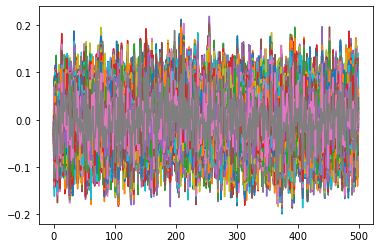

In [91]:
for i in range(len(ytrain)):
    if ytrain.iloc[i] == 1:
        plt.plot(xtrain_wa_df.iloc[i,:])
plt.show()

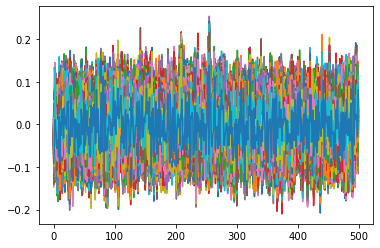

In [92]:
for i in range(len(ytrain)):
    if ytrain.iloc[i] == 0:
        plt.plot(xtrain_wa_df.iloc[i,:])
plt.show()

In [46]:
#pip install keras
#import sys
#!{sys.executable} -m pip install keras

In [47]:
#pip install tensorflow
#import sys
#!{sys.executable} -m pip install tensorflow

In [93]:
# importing sigmoid function from keras backend and using it
from keras.backend import sigmoid
def swish(x,beta = 1):
    return (x*sigmoid(beta*x))

In [94]:
# getting the custom object and updating them
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [95]:
# using SVM
from numpy.random import seed
seed(1)
import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_cols = xtrain_wa_df.shape[1]
n_rows = xtrain_wa_df.shape[0]

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(50,activation = 'swish',input_dim = n_cols))
    model.add(Dense(1,activation = 'sigmoid'))
    # compile model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# evaluate model
estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
kfold = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(estimator, xtrain_wa_df, ytrain, cv = kfold)
print(results)
print("Baseline: %.8f%%  (%.8f%%)" % (results.mean()*100,results.std()*100))

[0.86300063 0.86458993 0.87253654 0.86045772 0.86709064]
Baseline: 86.55350924%  (0.41118501%)


In [96]:
# predicting on first dataset
estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
estimator.fit(xtrain_wa_df,ytrain)
y_pred = estimator.predict(xtest_wa_df)
display(y_pred)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [97]:
# evaluating f1-score
from sklearn.metrics import f1_score,accuracy_score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

accuracy_score: 0.8699218004958993
f1_score: 0.8699218004958993
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      3127
           1       0.81      0.88      0.84      2116

    accuracy                           0.87      5243
   macro avg       0.86      0.87      0.87      5243
weighted avg       0.87      0.87      0.87      5243



In [98]:
# testing on the final test set
x_test_2 = df_test_2['title_abstract_combined_processed']
test_2_tokenized = x_test_2.apply(lambda r: w2v_tokenize_text(r)).values

xtest_2_wa = word_averaging_list(word_vectors,test_2_tokenized)

print(xtest_2_wa.shape)
xtest_2_wa_df = pd.DataFrame(xtest_2_wa)
y_pred_2 = estimator.predict(xtest_2_wa_df)
display(y_pred_2)

<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(8989, 500)


array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [99]:
# adding the results in the final dataframe
df_test_fs = pd.read_csv('test.csv')
df_test_fs = df_test_fs.drop(labels = ['TITLE','ABSTRACT'],axis = 1)
y_pred_list = np.array(y_pred_2).tolist()
df_pred = pd.DataFrame(y_pred_list)
df_test_fs['Computer Science'] = df_pred
display(df_test_fs)
#df_test_fs.to_csv('submission_u_1.csv', index = False)

,ID,Computer Science
0,20973,0
1,20974,0
2,20975,1
3,20976,0
4,20977,1
...,...,...
8984,29957,1
8985,29958,0
8986,29959,1
8987,29960,0


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


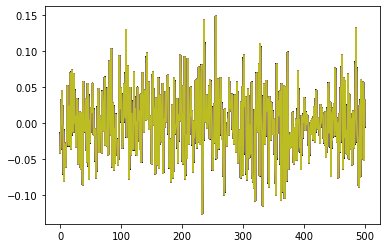

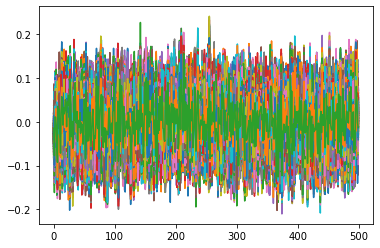

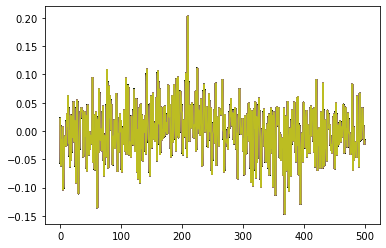

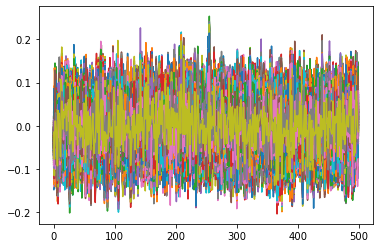

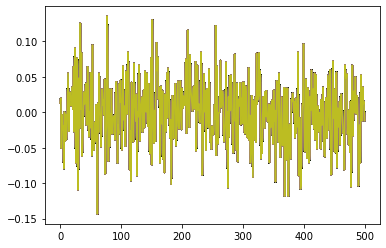

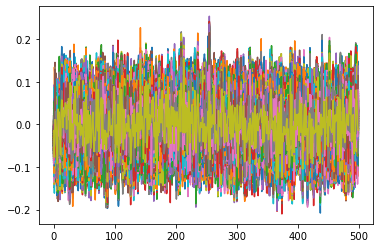

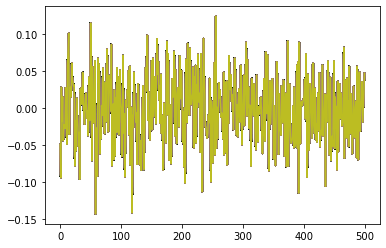

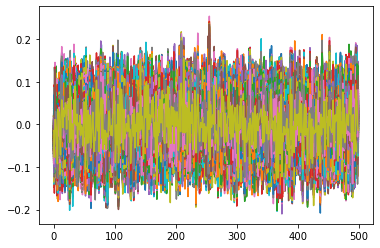

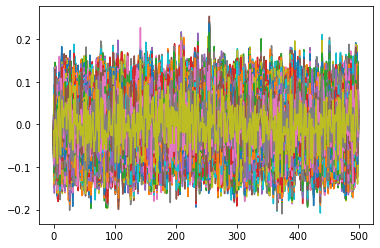

In [100]:
# Looping through other labels
for i in range(len(tagnames)-1):
    xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df[tagnames[i+1]], random_state = 42, test_size = 0.25, shuffle = True)
    
    train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
    test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values
    
    xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
    xtest_wa = word_averaging_list(word_vectors,test_tokenized)
    
    #print(xtrain_wa.shape[1]) 
    xtrain_wa_df = pd.DataFrame(xtrain_wa)
    xtest_wa_df = pd.DataFrame(xtest_wa)
    for j in range(len(ytrain)):
        if ytrain.iloc[i] == 1:
            plt.plot(xtrain_wa_df.iloc[i,:])
    plt.show()
    
    for i in range(len(ytrain)):
        if ytrain.iloc[i] == 0:
            plt.plot(xtrain_wa_df.iloc[i,:])
    plt.show()
    

In [101]:
# Looping through other labels
for i in range(len(tagnames)-1):
    xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df[tagnames[i+1]], random_state = 42, test_size = 0.25, shuffle = True)
    
    train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
    test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values
    
    xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
    xtest_wa = word_averaging_list(word_vectors,test_tokenized)
    xtrain_wa_df = pd.DataFrame(xtrain_wa)
    xtest_wa_df = pd.DataFrame(xtest_wa)
    # evaluate model
    estimator = KerasClassifier(build_fn = create_baseline, epochs = 25, batch_size = 5, verbose = 0)
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)
    results = cross_val_score(estimator, xtrain_wa_df, ytrain, cv = kfold)
    print(results)
    print("Baseline: %.8f%%  (%.8f%%)" % (results.mean()*100,results.std()*100))

<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.93165922 0.92752701 0.93388432 0.93801653 0.93227345]
Baseline: 93.26721072%  (0.33967411%)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.89669424 0.89828354 0.90972662 0.90495867 0.89825118]
Baseline: 90.15828490%  (0.49719430%)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.88302606 0.89160842 0.89160842 0.88334394 0.88712239]
Baseline: 88.73418450%  (0.37700050%)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.97139227 0.97012079 0.9726637  0.97202796 0.97106516]
Baseline: 97.14539766%  (0.08631641%)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.99014622 0.98410678 0.98823905 0.98537827 0.98728138]
Baseline: 98.70303392%  (0.21217572%)


In [ ]:
# Looping through other labels
for i in range(len(tagnames)-1):
    # Split the train and test dataset
    xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df[tagnames[i+1]], random_state = 42, test_size = 0.25, shuffle = True)
    
    train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
    test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values
    
    xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
    xtest_wa = word_averaging_list(word_vectors,test_tokenized)
    
    xtrain_wa_df = pd.DataFrame(xtrain_wa)
    xtest_wa_df = pd.DataFrame(xtest_wa)
    # predicting on first dataset
    estimator = KerasClassifier(build_fn = create_baseline, epochs = 25, batch_size = 5, verbose = 0)
    estimator.fit(xtrain_wa_df,ytrain)
    y_pred = estimator.predict(xtest_wa_df)
    print("accuracy_score:", accuracy_score(ytest,y_pred))
    print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
    print(classification_report(ytest,y_pred))
    
    x_test_2 = df_test_2['title_abstract_combined_processed']
    test_2_tokenized = x_test_2.apply(lambda r: w2v_tokenize_text(r)).values
    xtest_2_wa = word_averaging_list(word_vectors,test_2_tokenized)
    print(xtest_2_wa.shape)
    xtest_2_wa_df = pd.DataFrame(xtest_2_wa)
    y_pred_2 = estimator.predict(xtest_2_wa_df)
    
    y_pred_list = np.array(y_pred_2).tolist()
    df_pred = pd.DataFrame(y_pred_list)
    df_test_fs[tagnames[i+1]] = df_pred
display(df_test_fs)

<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


accuracy_score: 0.9252336448598131
f1_score: 0.9252336448598131
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3716
           1       0.88      0.86      0.87      1527

    accuracy                           0.93      5243
   macro avg       0.91      0.91      0.91      5243
weighted avg       0.92      0.93      0.92      5243



<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(8989, 500)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


accuracy_score: 0.9015830631317948
f1_score: 0.9015830631317948
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3815
           1       0.83      0.81      0.82      1428

    accuracy                           0.90      5243
   macro avg       0.88      0.87      0.88      5243
weighted avg       0.90      0.90      0.90      5243



<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(8989, 500)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


accuracy_score: 0.8828914743467481
f1_score: 0.8828914743467481
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3937
           1       0.83      0.67      0.74      1306

    accuracy                           0.88      5243
   macro avg       0.86      0.81      0.83      5243
weighted avg       0.88      0.88      0.88      5243



<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(8989, 500)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


accuracy_score: 0.9692923898531375
f1_score: 0.9692923898531375
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5076
           1       0.52      0.41      0.46       167

    accuracy                           0.97      5243
   macro avg       0.75      0.70      0.72      5243
weighted avg       0.97      0.97      0.97      5243



<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(8989, 500)


<ipython-input-72-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


In [54]:
# exporting the final results in proper format
df_test_fs.to_csv('submission_u_keras_w2v.csv', index = False)